SVM Accuracy: 1.00
KNN Accuracy: 1.00
Random Forest Accuracy: 1.00


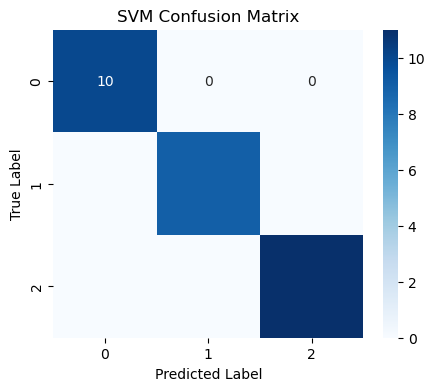

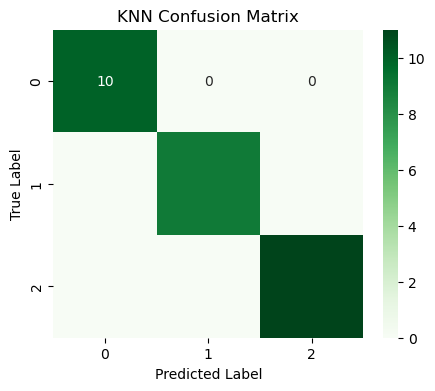

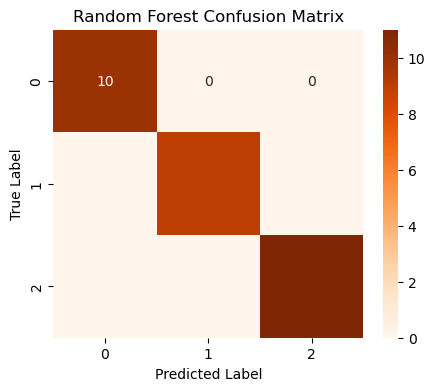

Predicted Class (SVM): setosa
Predicted Class (KNN): setosa
Predicted Class (RF): setosa


C:\Users\ASUS\anaconda3\install\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


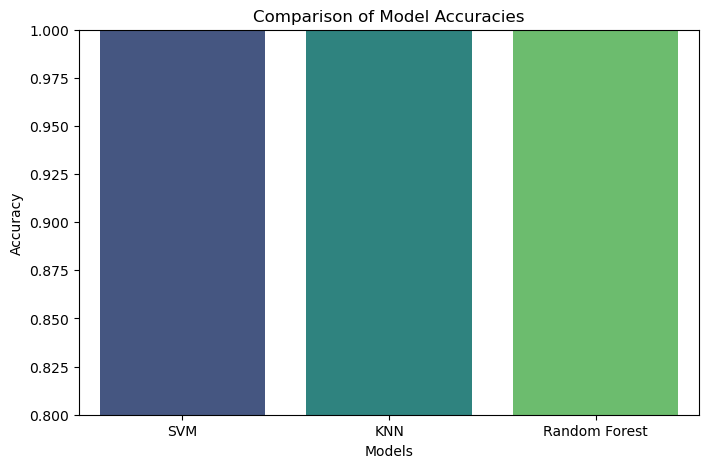

C:\Users\ASUS\anaconda3\install\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


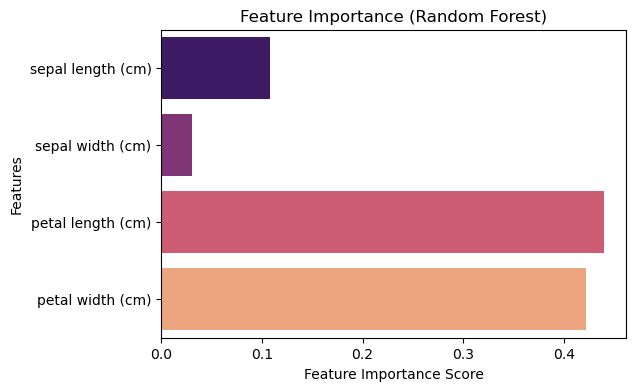

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classifiers
svm_model = SVC(kernel='linear')
knn_model = KNeighborsClassifier(n_neighbors=5)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

svm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print accuracy results
print(f"SVM Accuracy: {accuracy_svm:.2f}")
print(f"KNN Accuracy: {accuracy_knn:.2f}")
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

# Compute confusion matrices
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_svm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("SVM Confusion Matrix")
plt.show()

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_knn, annot=True, cmap="Greens", fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("KNN Confusion Matrix")
plt.show()

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_rf, annot=True, cmap="Oranges", fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Random Forest Confusion Matrix")
plt.show()

# Predict class for a new sample
sample = [[5.1, 3.5, 1.4, 0.2]]
svm_pred = iris.target_names[svm_model.predict(sample)[0]]
knn_pred = iris.target_names[knn_model.predict(sample)[0]]
rf_pred = iris.target_names[rf_model.predict(sample)[0]]

print("Predicted Class (SVM):", svm_pred)
print("Predicted Class (KNN):", knn_pred)
print("Predicted Class (RF):", rf_pred)

# Plot Accuracy Comparison Graph
models = ['SVM', 'KNN', 'Random Forest']
accuracies = [accuracy_svm, accuracy_knn, accuracy_rf]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette="viridis")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.ylim(0.8, 1.0)
plt.show()

# Plot feature importance
feature_importance = rf_model.feature_importances_
feature_names = iris.feature_names

plt.figure(figsize=(6, 4))
sns.barplot(x=feature_importance, y=feature_names, palette="magma")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance (Random Forest)")
plt.show()

